In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import time
import datetime as dt
import os
import seaborn as sns
import scipy.stats as sts

import random
import string

In [2]:
from nb_vars import FOLDER_OUTPUT_BASE, CUTOFF_SPIKES_HZ

## Load df of filtered peaks

In [3]:
CONDITION_NAME = "placa"
CONDITION = "2"

folder_input =  f'{FOLDER_OUTPUT_BASE}/{CONDITION_NAME}_{CONDITION}'

In [4]:
df_peaks = pd.read_csv(f'{folder_input}/df_peaks_full_{CONDITION_NAME}_{CONDITION}_freq_{CUTOFF_SPIKES_HZ}.csv')

In [5]:
df_peaks

,condition,treatment,well,well_num,replicate,electrode,time
0,BP,PRE,C5,35,1,11,1.30408
1,BP,PRE,C5,35,1,11,1.30584
2,BP,PRE,C5,35,1,11,1.31248
3,BP,PRE,C5,35,1,11,1.32136
4,BP,PRE,C5,35,1,11,1.32320
...,...,...,...,...,...,...,...
3578566,BP+LINK3,POST,C4,34,3,44,393.63888
3578567,BP+LINK3,POST,C4,34,3,44,393.64024
3578568,BP+LINK3,POST,C4,34,3,44,393.68944
3578569,BP+LINK3,POST,C4,34,3,44,393.76856


## Relative change in MFR

In [6]:
df_MFR = df_peaks.groupby(['condition', 'treatment', 'well', 'replicate', 'electrode']).count()['time'] / (df_peaks['time'].max() - df_peaks['time'].min())
df_MFR = df_MFR.reset_index().sort_values(by=['well', 'electrode'])
df_MFR = df_MFR.rename(columns={'time': 'MFR'})
df_MFR

,condition,treatment,well,replicate,electrode,MFR
44,BP+LINK1,POST,A1,1,12,17.466100
93,BP+LINK1,PRE,A1,1,12,11.771735
45,BP+LINK1,POST,A1,1,13,48.281616
94,BP+LINK1,PRE,A1,1,13,33.344372
46,BP+LINK1,POST,A1,1,14,30.358952
...,...,...,...,...,...,...
387,LINK3,PRE,D6,2,32,11.885876
364,LINK3,POST,D6,2,33,4.180095
388,LINK3,PRE,D6,2,33,7.140150
365,LINK3,POST,D6,2,43,56.367867


In [7]:
df_MFR[df_MFR['treatment'] == 'POST']

,condition,treatment,well,replicate,electrode,MFR
44,BP+LINK1,POST,A1,1,12,17.466100
45,BP+LINK1,POST,A1,1,13,48.281616
46,BP+LINK1,POST,A1,1,14,30.358952
47,BP+LINK1,POST,A1,1,21,38.980398
48,BP+LINK1,POST,A1,1,22,26.802828
...,...,...,...,...,...,...
361,LINK3,POST,D6,2,23,45.844073
362,LINK3,POST,D6,2,24,8.078642
363,LINK3,POST,D6,2,32,23.906185
364,LINK3,POST,D6,2,33,4.180095


In [8]:
df_MFR_ratio = df_MFR[df_MFR['treatment'] == 'POST']

ratios = df_MFR[df_MFR['treatment'] == 'POST']['MFR'].values /  df_MFR[df_MFR['treatment'] == 'PRE']['MFR'].values

df_MFR_ratio.loc[:, 'PRE'] = df_MFR[df_MFR['treatment'] == 'PRE'].loc[:, 'MFR'].values
df_MFR_ratio.loc[:, 'POST'] = df_MFR[df_MFR['treatment'] == 'POST'].loc[:, 'MFR'].values
df_MFR_ratio['mean_PRE_POST'] = (df_MFR_ratio['PRE'] + df_MFR_ratio['POST']) / 2

df_MFR_ratio = df_MFR_ratio.rename(columns={'MFR': 'MFR_ratio'})[['condition', 'well', 'replicate', 'electrode', 'PRE', 'POST', 'mean_PRE_POST', 'MFR_ratio']]
df_MFR_ratio['MFR_ratio'] = ratios * 100

df_MFR_ratio

df_MFR_ratio.to_csv(f'{folder_input}/MFR_msec_{msec}_freq_{CUTOFF_SPIKES_HZ}.csv', sep=';', index=None)

/tmp/ipykernel_41131/1763265715.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MFR_ratio.loc[:, 'PRE'] = df_MFR[df_MFR['treatment'] == 'PRE'].loc[:, 'MFR'].values
/tmp/ipykernel_41131/1763265715.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MFR_ratio.loc[:, 'POST'] = df_MFR[df_MFR['treatment'] == 'POST'].loc[:, 'MFR'].values
/tmp/ipykernel_41131/1763265715.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

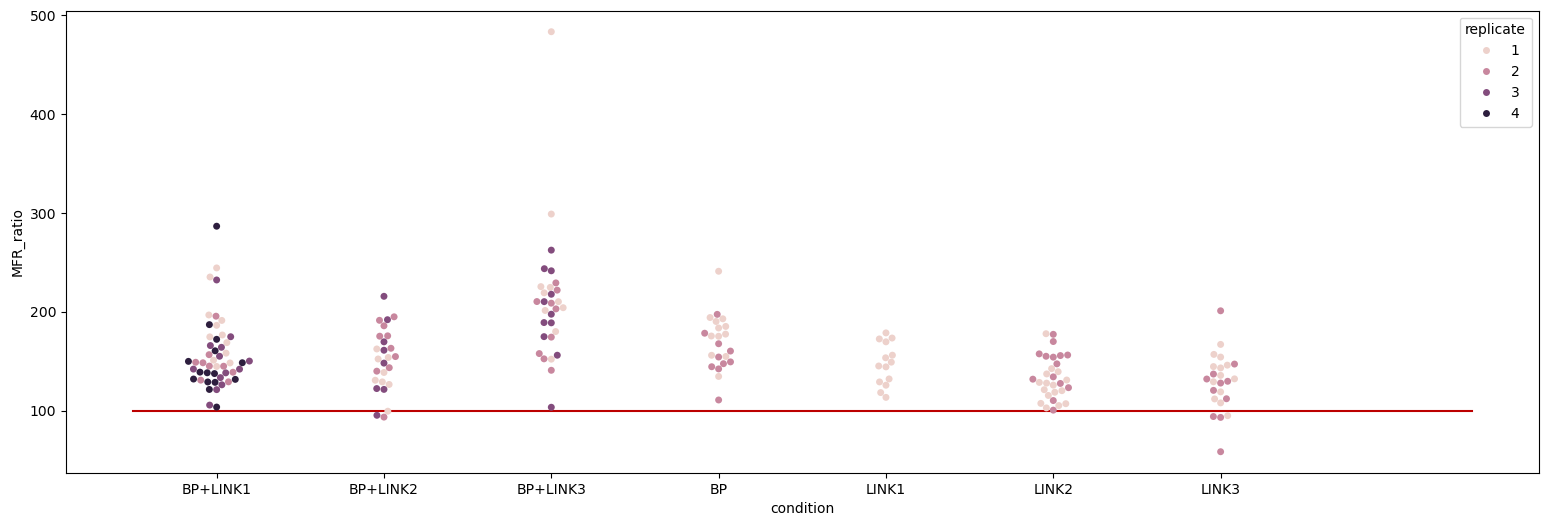

In [9]:
fig = plt.figure(figsize=(19,6))
sns.swarmplot(data = df_MFR_ratio, x='condition', y='MFR_ratio', hue='replicate')
plt.plot([-0.5, 7.5], [100, 100], c='#bc0000')

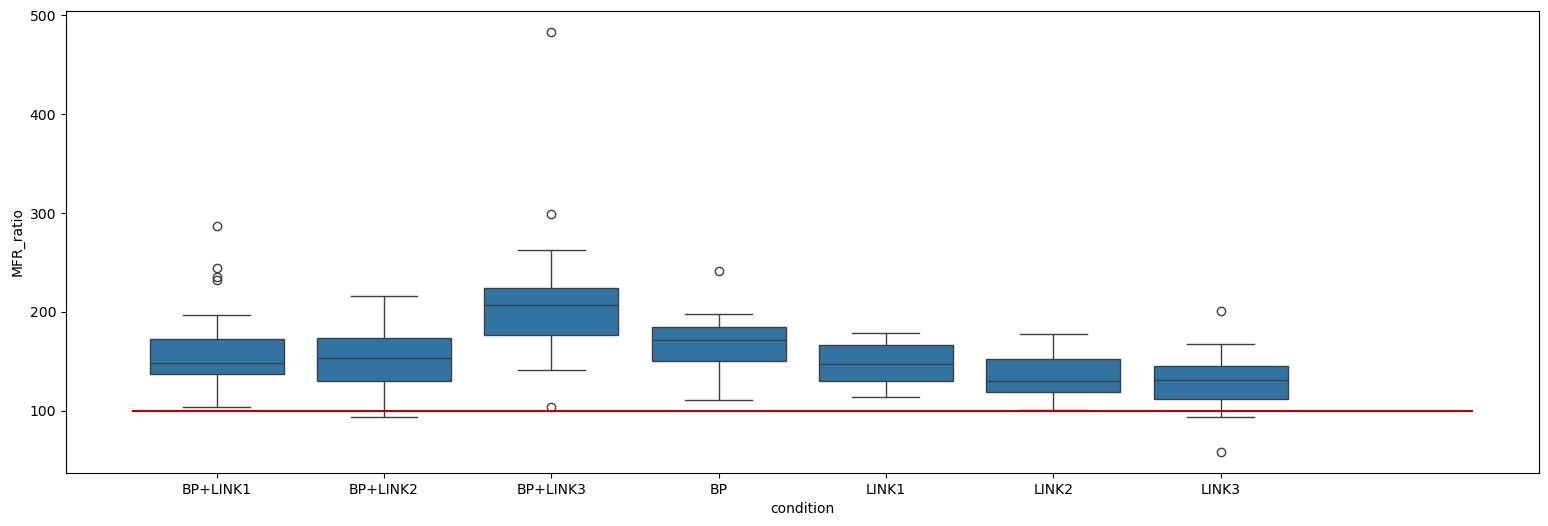

In [10]:
fig = plt.figure(figsize=(19,6))
sns.boxplot(data = df_MFR_ratio, x='condition', y='MFR_ratio')
plt.plot([-0.5, 7.5], [100, 100], c='#bc0000')

<Axes: xlabel='PRE', ylabel='MFR_ratio'>

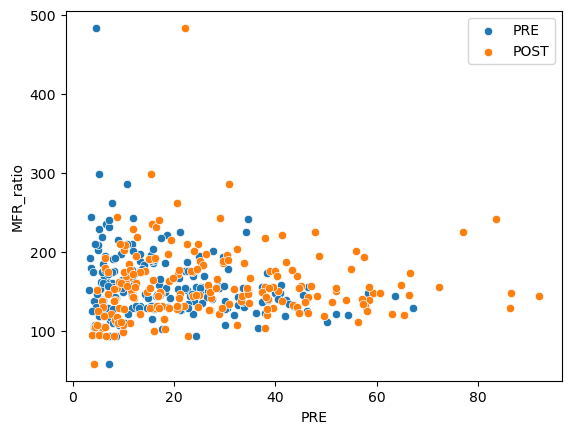

In [11]:
sns.scatterplot(data = df_MFR_ratio, x='PRE', y='MFR_ratio', label='PRE')
sns.scatterplot(data = df_MFR_ratio, x='POST', y='MFR_ratio', label='POST')

162.16114101835345 -0.16980357243884003 0.0


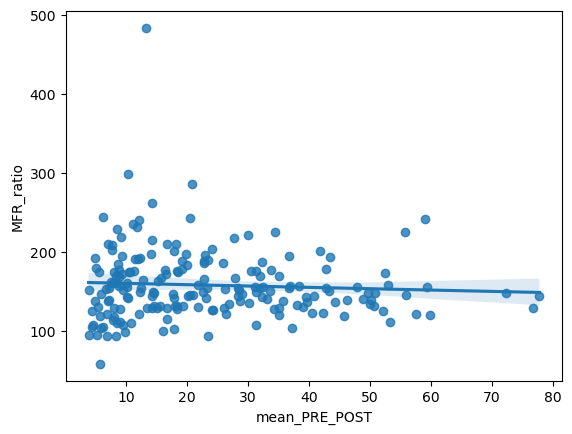

In [12]:
#create regplot
p = sns.regplot(data = df_MFR_ratio, x='mean_PRE_POST', y='MFR_ratio')

#calculate slope and intercept of regression equation
slope, intercept, r, p, sterr = sts.linregress(x=p.get_lines()[0].get_xdata(),
                                                       y=p.get_lines()[0].get_ydata())

#display slope and intercept of regression equation
print(intercept, slope, p)
